# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set described in lecture can be obtained as a single file, `diabetes-data.csv`, from the course website. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

Sources: edx.org UCSanDiegoX DSE220x Machine Learning Fundamentals asset week 4.

## 1. Set up notebook dan load data set

In [2]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

Kode berikut digunakan untuk load diabetes data, dimana terdapat 442 data points dengan 10 fitur atau variabel predictor yang dinotasikan `x` dan satu response variabel yang dinotasikan `y`. Dimana x dan y akan berupa suatu array.

In [3]:
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

Untuk mempermudah mengamati data, data tersebut bisa dijadikan dalam suatu DataFrame sebagai berikut:

In [4]:
import pandas as pd
df = pd.DataFrame(x,columns=features)
df.head()

,age,sex,body mass index,blood pressure,serum1,serum2,serum3,serum4,serum5,serum6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


## 2. Memprediksi `y` tanpa data `x`

Jika kita ingin memprediksi `y` tanpa diberikan suatu data `x`, nilai `y` apa yang bisa dijadikan prediksi? NIlai rata-rata <font color="magenta">mean</font> dari `y`.

Pada kasus kita disini mean squared error (MSE) dapat diasosiasikan sebagai variance `y`.

In [5]:
print("Prediction: ", np.mean(y))
print("Mean squared error: ", np.var(y))

Prediction:  152.13348416289594
Mean squared error:  5929.884896910383


## 3. Memprediksi `y` menggunakan satu buah fitur `x`

Untuk menerapkan data pada sebuah linear regression model $y=wx+b$, kita dapat mencari koefisien $w$ dan konstanta intercept $b$ dengan formula berikut:

$\begin{equation}b=\bar{y}-w\bar{x}\end{equation}$
$\begin{equation}w=\frac{\frac{\sum x_iy_i}{n}-\bar{x}\bar{y}}{\frac{\sum x_i^2}{n}-\bar{x}^2}=\frac{cov(X,Y)}{\sigma_x^2}\end{equation}$

Disini kita akan definisikan function **one_feature_regression_manual**, dengan input data `x` dan `y`, beserta index `f`untuk satu buah fitur pada `x`, lalu akan kita plots the data points beserta persamaan garis yang dihasilkan.

In [6]:
def one_feature_regression_manual(x,y,f):
    if (f < 0) or (f > 9):
        print("Feature index is out of bounds")
        return
    x1 = x[:,f] #Memilih kolom sesuai fitur f
    mean_x1 = np.mean(x1) #Menghitung mean dari fitur f
    mean_y = np.mean(y) #Menghitung mean dari y
    var_x1 = np.var(x1) #Menghitung variance pada fitur f
    cov_x1_y = (np.mean(x1*y)) - (mean_x1*mean_y) #Menghitung covariance fitur f pada y
    w = cov_x1_y/var_x1 #Koefisien w
    b = mean_y-w*mean_x1 #Intercept b
    y_pred = w*x1+b #Mencari prediksi y
    mean_s_error = np.mean((y-y_pred)**2) #Menghitung mean squared error
    plt.plot(x1,y, 'bo')
    plt.plot(x1,y_pred, 'r-', linewidth = 3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print("Mean squared error: ",mean_s_error)
    return (w,b,mean_s_error)

Kita dapat menghasilkan hasil yang sama pada fit regression linear model dengan menggunakan library **scikit-learn** pada `sklearn.linear_model.LinearRegression()`. Kita buat function baru **one_feature_regression** dengan parameter yang sama dengan **one_feature_regression_manual** sebagai berikut:

In [7]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print("Mean squared error: ", mean_squared_error(y, y_pred))
    return regr

Mari kita coba pada fitur #2 (body mass index).

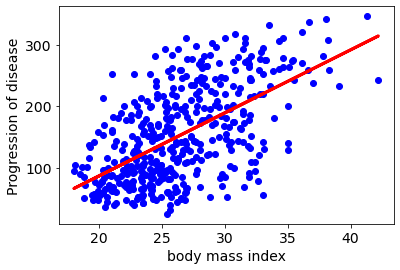

Mean squared error:  3890.456585461273


(10.233127870100791, -117.77336656656567, 3890.456585461273)

In [8]:
one_feature_regression_manual(x,y,2)

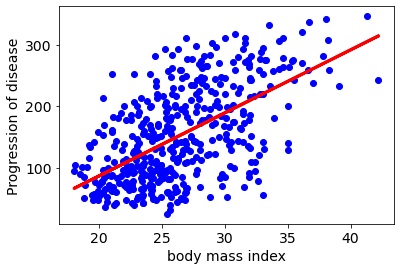

Mean squared error:  3890.4565854612724
w =  [10.23312787]
b =  -117.77336656656527


In [9]:
regr = one_feature_regression(x,y,2)
print("w = ", regr.coef_)
print("b = ", regr.intercept_)

Fitur #2 ('body mass index') merupakan fitur tunggal dengan mean squared error terendah. Manakah fitur kedua terendah?

Kita akan coba plot beserta mean squared error pada masing-masing fitur, dan memasukkannya ke dalam suatu list

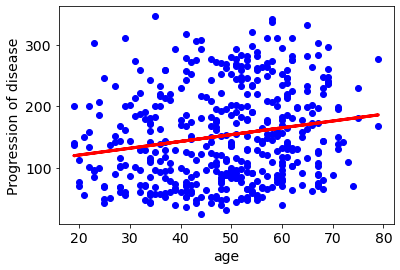

Mean squared error:  5720.5470172056475


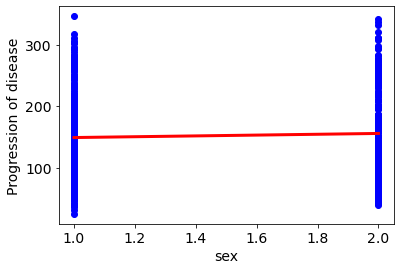

Mean squared error:  5918.888899586022


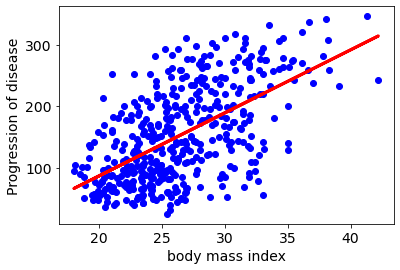

Mean squared error:  3890.456585461273


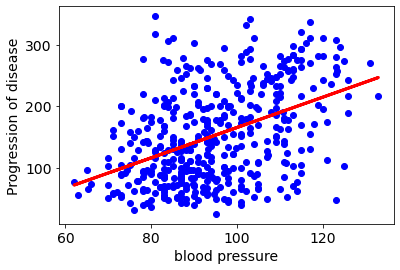

Mean squared error:  4774.113902368687


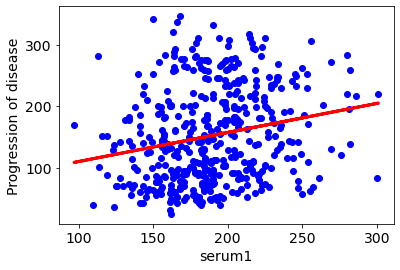

Mean squared error:  5663.315623739354


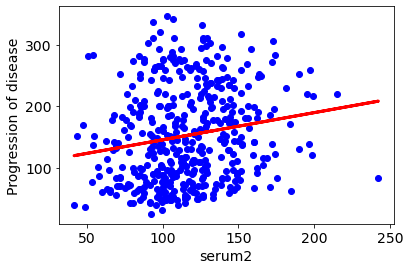

Mean squared error:  5750.241102677781


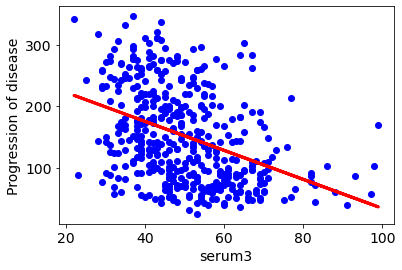

Mean squared error:  5005.661620710652


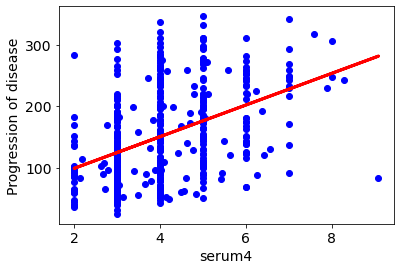

Mean squared error:  4831.13838643409


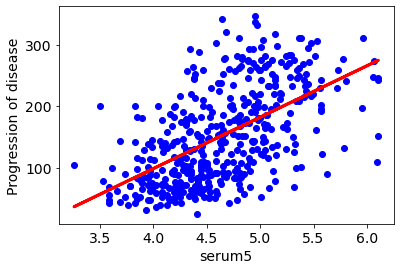

Mean squared error:  4030.998722591287


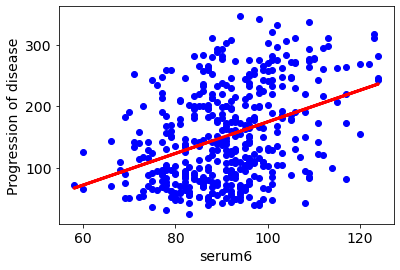

Mean squared error:  5062.380594520542


[5720.5470172056475,
 5918.888899586022,
 3890.456585461273,
 4774.113902368687,
 5663.315623739354,
 5750.241102677781,
 5005.661620710652,
 4831.13838643409,
 4030.998722591287,
 5062.380594520542]

In [10]:
list_mse = []
for i in range(len(features)):
    list_mse.append(one_feature_regression_manual(x,y,i)[2])

list_mse

In [11]:
print(f'Mean squared error nomor dua terendah adalah {features[8]}.')

Mean squared error nomor dua terendah adalah serum5.


## 3. Memprediksi `y` menggunakan lebih dari satu fitur pada `x`

Kita akan coba membuat function **feature_subset_regression** yang mirip dengan function sebelumnya **one_feature_regression**, namun dengan parameter `flist` yang berupa suatu list fitur yang akan diterapkan.

Pertama kita akan coba membuat function regression dengan manual menggunakan konsep matematika, dimana persamaan linear regression berbentuk $y=w.x+b$, apabila kita menggunakan sebanyak $m$ fitur, maka $y=w_1x_1+w_2x_2+...+w_mx_m+b$ dimana $w,m\in \mathbb{R}^{m}$.

Kita akan mencari koefsien $b,w_1,..,w_m$ dengan membentuk sebagai suatu vektor $\tilde{w}=(b,w_1,..,w_m)$, dimana:

$\begin{equation} \tilde{w}=(X^TX^{-1})(X^Ty)\end{equation}$
$\begin{equation}X = \begin{pmatrix}
1 & x_{11} & ...&x_{1m}\\
1 & x_{21} & ...&x_{2m}\\
{\vdots} & {\vdots} & ...&\vdots\\
1 & x_{n1} & ... & x_{nm}
\end{pmatrix}, y=\begin{pmatrix}y_1\\y_2\\{\vdots}\\y_n\end{pmatrix} \end{equation}$

In [12]:
def feature_subset_regression_manual(x,y,flist):
    if len(flist) < 1:
        print("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print("Feature index is out of bounds")
            return
    x1 = x[:,flist] #Memilih array fitur
    mean_y = np.mean(y) #Mean y
    one_arr = np.ones((len(y),1)) #Membuat matrix coloumn dengan elemen 1
    X = np.hstack([one_arr,x1]) #Menggabungkan secara horizontal
    A = np.linalg.inv(X.T @ X) @ (X.T @ y)
    w = A[1:]
    b = A[0]
    y_pred = X @ A
    mean_s_error = np.mean((y-y_pred)**2)
    print("w = ", w)
    print("b = ", b)
    print("Mean squared error: ", mean_s_error)
    return (w,b,mean_s_error)

Kita dapat mencari koefisien pada $\tilde{w}$ dengan `sklearn.linear_model.LinearRegression()` sebagai berikut:

In [23]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

Kita coba terapkan dengan fitur #2 (body mass index) dan #8 (serum5).

In [14]:
f_list = [2,8]
feature_subset_regression_manual(x,y,f_list)

w =  [ 7.27600054 56.05638703]
b =  -299.9575150802366
Mean squared error:  3205.1900768248533


(array([ 7.27600054, 56.05638703]), -299.9575150802366, 3205.1900768248533)

In [15]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print("w = ", regr.coef_)
print("b = ", regr.intercept_)
print("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

w =  [ 7.27600054 56.05638703]
b =  -299.95751508023625
Mean squared error:  3205.1900768248533


Dengan semua 10 fitur, kita dapatkan:

In [16]:
regr = feature_subset_regression(x,y,range(0,10))
print("w = ", regr.coef_)
print("b = ", regr.intercept_)
print("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

w =  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
b =  -334.5671385187868
Mean squared error:  2859.6963475867506


In [17]:
feature_subset_regression_manual(x,y,range(0,10))

w =  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
b =  -334.5671385185742
Mean squared error:  2859.6963475867506


(array([-3.63612242e-02, -2.28596481e+01,  5.60296209e+00,  1.11680799e+00,
        -1.08999633e+00,  7.46450456e-01,  3.72004715e-01,  6.53383194e+00,
         6.84831250e+01,  2.80116989e-01]),
 -334.5671385185742,
 2859.6963475867506)

## 4. Membagi data menjadi training dan test set

Pada percobaan di atas, setiap model 'fit' pada keeseluruhan data set, dan mean squared error dievaluasi juga pada data set yang sama. Metode tersebut secara umum tidak akurat dalam estimasi ke depannya. Dalam kasus ini, hal tersebut tidaklah begitu buruk karena jumlah data set relatif cukup besar dibandingkan jumlah fitur-fiturnya.

Untuk menginvestigasi lebih lanjut, kita definisikan prosedur **split_data** yang membagi data set keseluruhan menjadi training dan test set. Terdapat berbagai cara untuk membagi data tersebut menjadi training dan test, disini kita menerapkan suatu function *split_data* untuk hal tersebut.

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` adalah jumlah data train
* `trainx` dan `trainy` data training and response values
* `testx` and `testy` data test and response values

Split data dilakukan secara random dengan permutasi, dengan random seed yang tetap, dimana kita tetap mendapatkan hasil yang sama berulang kali dengan parameter `n_train` yang sama. Secara detailnya dapat dilihat pada function split_data berikut:

In [24]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print("Invalid number of training points")
        return
    np.random.seed(0) #Menetapkan random seed agar hasil dari permutasi akan selalu tetap
    perm = np.random.permutation(442) #Membentuk susunan acak dari deretan angka 0-442.
    training_indices = perm[range(0,n_train)] #Menetepkan indeks untuk training data
    test_indices = perm[range(n_train,442)] #Menetepkan indeks untuk test data
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

Kita coba terapkan **split_data** untuk membagi data set, kemudian menghitung nilai train MSE dan test MSE dengan semua 10 fitur sebagai variabel independent dengan jumlah train data `n_train = 200`.

In [19]:
trainx, trainy, testx, testy = split_data(200)

In [20]:
regr_200 = feature_subset_regression(trainx,trainy,range(0,10))

In [21]:
y_pred = regr_200.predict(testx)
mse = np.mean((testy-y_pred)**2)
print(f'Mean squared error from 200 train data is {mse}')

Mean squared error from 200 train data is 3028.4720465919386


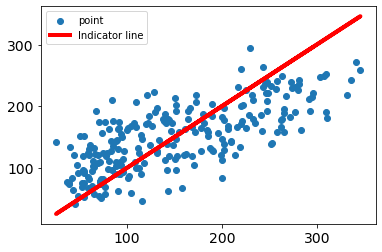

In [22]:
plt.scatter(testy,y_pred)
plt.plot(testy,testy, '-r', linewidth = 4)
plt.legend(['point','Indicator line'])
plt.show()